<a href="https://colab.research.google.com/github/jh941213/jh941213/blob/main/%EA%B9%80%EC%9E%AC%ED%98%84_3%E1%84%8E%E1%85%A1_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 머신러닝 문제
1. bike.csv 파일을 불러오세요.

* datetime : 기록 일시(1시간 간격)
* season : 계절(봄 : 1, 여름 : 2, 가을 : 3, 겨울 : 4)
* holiday : 공휴일 여부(0 : 공휴일 아님, 1 : 공휴일)
* workingday : 근무일 여부(0 : 근무일 아님, 1 : 근무일)
* weather : 날씨(1 : 맑음, 2 : 옅은 안개, 3 : 약한 눈 or 약한 번개 or 흐림, 4 : 폭우 or 짙은 안개)
* temp : 실제 온도
* atemp : 체감 온도
* humidity : 상대 습도
* windspeed : 풍속
* casual : 등록되지 않은 사용자(비회원 수)
* registered : 등록된 사용자(회원) 수
* count : 자전거 대여 수량

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sk
# bike(제출용), tra
bike = pd.read_csv("bike.csv")
bike
train_data =pd.read_csv("bike.csv")
train_data
test_data = pd.read_csv("bike.csv")
test_data
plt.style.use('seaborn')
sns.set(font_scale=2.5)

2. 자전거 대여 수요 예측을 해주는 프로그램을 만들어보세요. 다양한 모델을 활용해서 가장 높은 정확도를 이끌어보세요.  
(count열이 자전거의 수요값입니다. 다양한 특성을 활용해서 자전거의 수요를 예측해보세요.)

In [ ]:
bike.head()
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train_data.info()
test_data.head()#데이터 타입 확인
#string ->datetime 타입 변환 //object -> datatime 변환
test_data.head()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#시각화를 위한 데이터 준비
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['year'] = train_data['datetime'].dt.year
train_data['month'] = train_data['datetime'].dt.year 
train_data['day'] = train_data['datetime'].dt.year 
train_data['hour'] = train_data['datetime'].dt.year 

train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,2011,2011,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,2011,2011,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2011,2011,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,2011,2011,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,2011,2011,2011


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


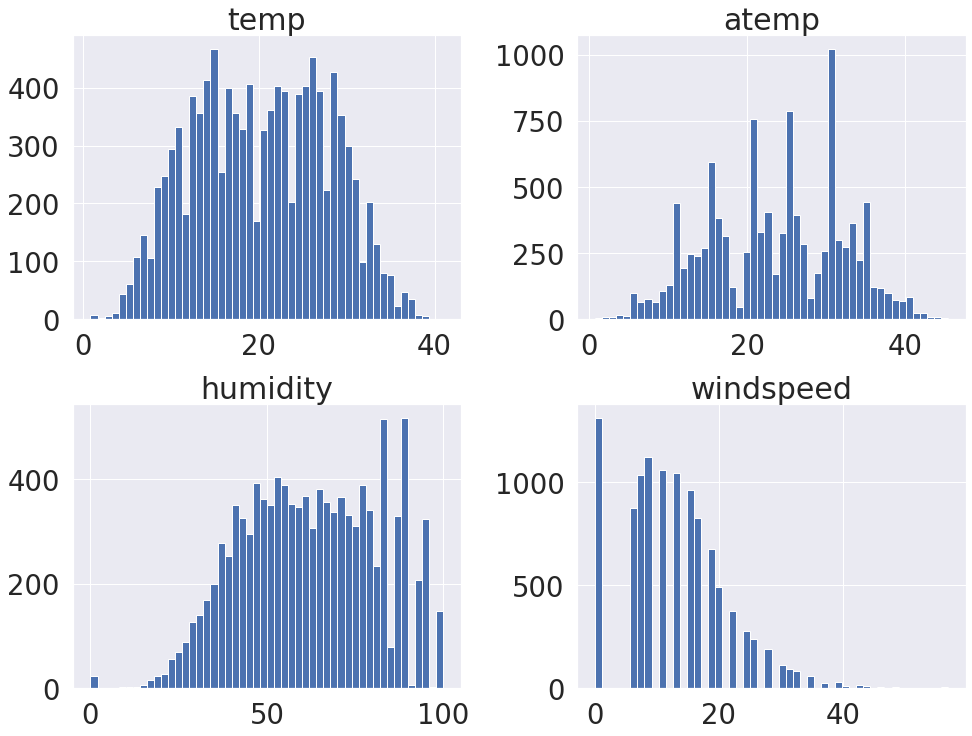

In [ ]:
#시각화
fig, ax = plt.subplots(figsize=(16,12))
train_data[['temp','atemp','humidity','windspeed']].hist(bins=50, ax=ax)

plt.show()

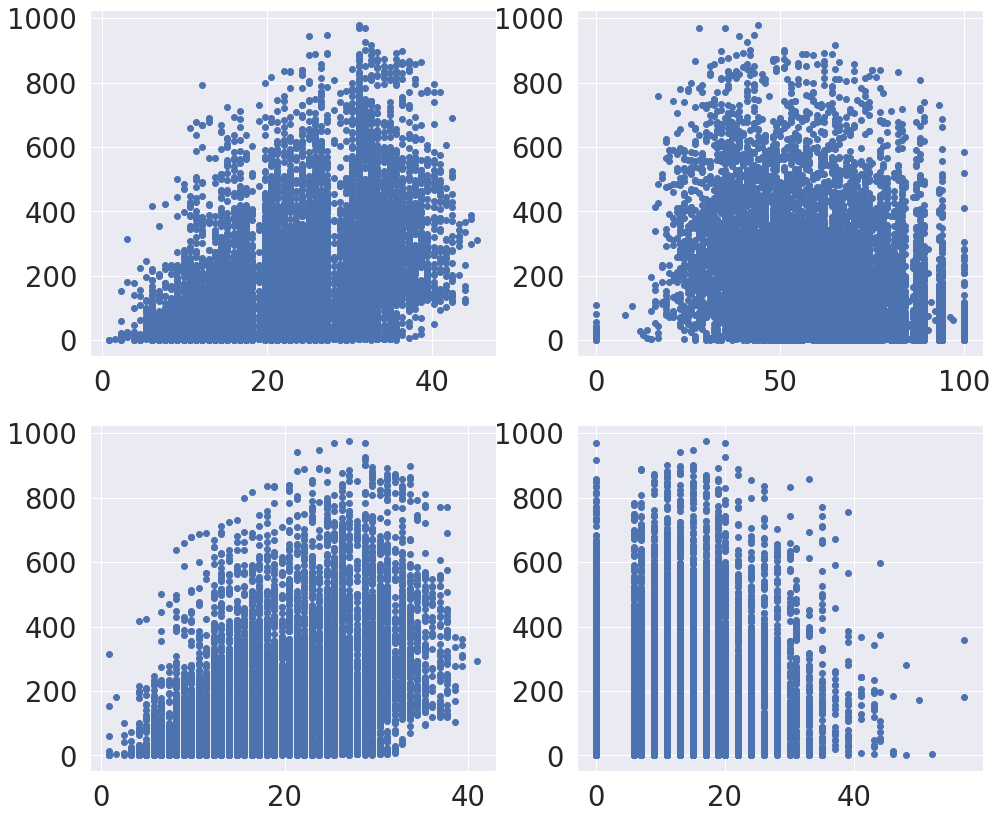

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(16,14))

ax[0][0].scatter(train_data['atemp'],train_data['count'])
ax[0][1].scatter(train_data['humidity'],train_data['count'])
ax[1][0].scatter(train_data['temp'],train_data['count'])
ax[1][1].scatter(train_data['windspeed'],train_data['count'])

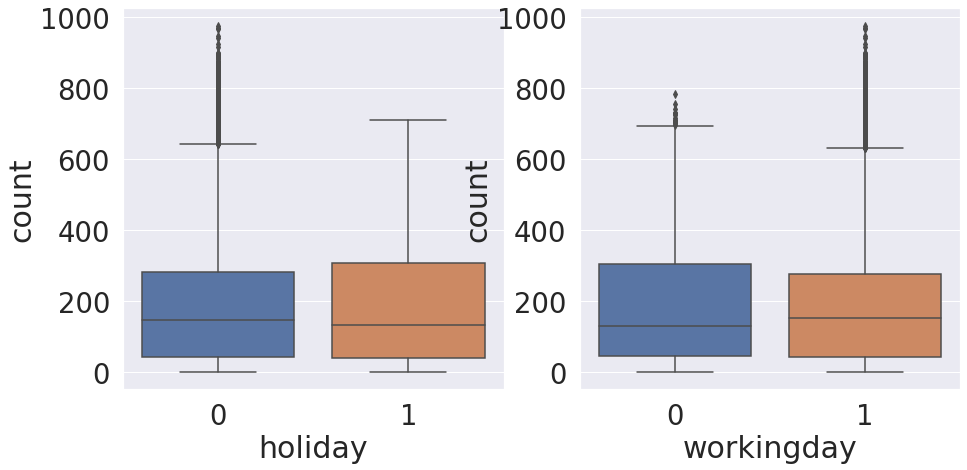

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

sns.boxplot(data=train_data, x='holiday', y='count', ax=ax[0])
sns.boxplot(data=train_data, x='workingday', y='count', ax=ax[1])
plt.show()

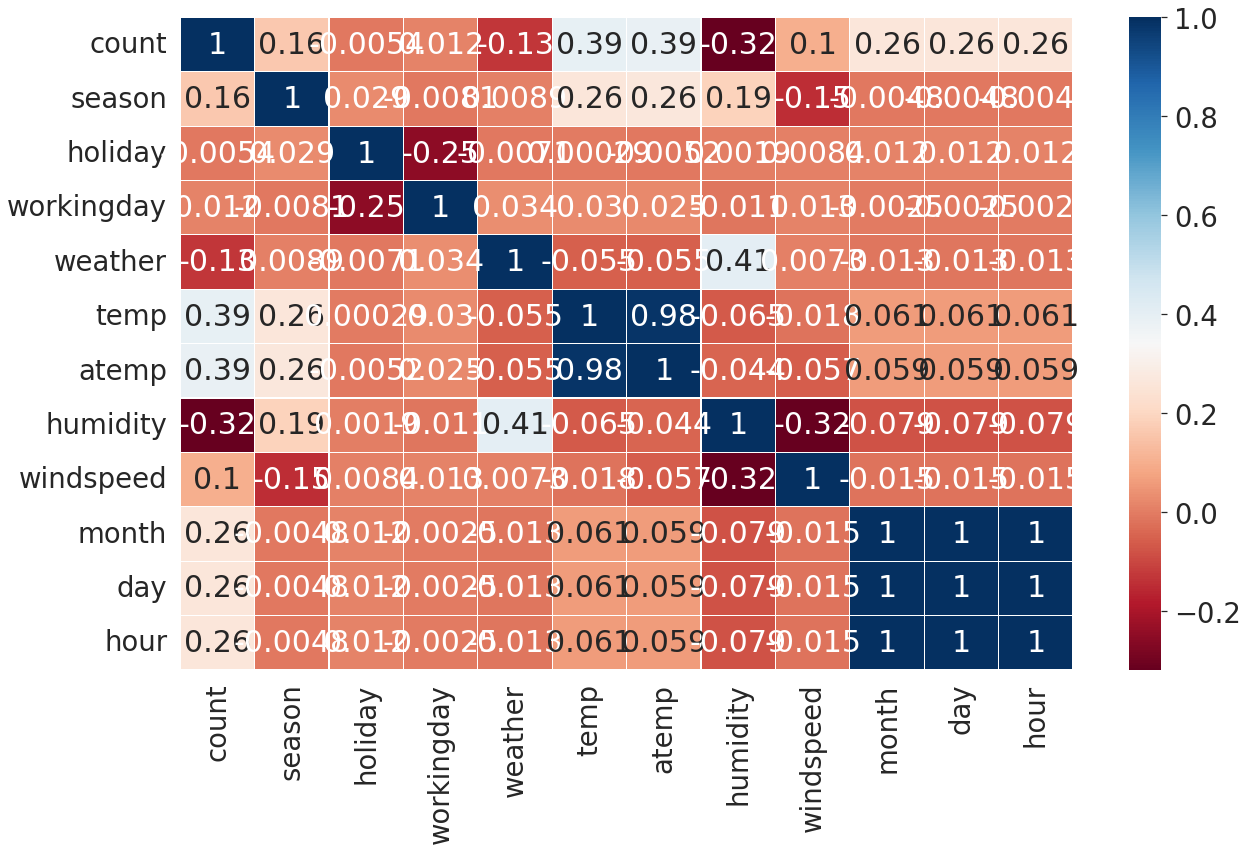

In [ ]:
corr_train = train_data[['count','season','holiday','workingday','weather','temp','atemp', 'humidity', 'windspeed','month','day','hour']].corr()

fig,ax=plt.subplots(figsize=(20,12))

sns.heatmap(data=corr_train, ax=ax, linewidths=0.1, linecolor='white',annot=True,cmap=plt.cm.RdBu)
plt.show()